In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Amazon.csv")

In [5]:
df.head()


,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [8]:
df.describe()

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.001400,302.905748,0.074226,68.468902,7.406660,918.256479
std,1.413548,171.840797,0.082583,74.131180,4.324057,724.508332
min,1.000000,5.000000,0.000000,0.000000,0.000000,4.270000
25%,2.000000,154.190000,0.000000,15.920000,3.680000,340.890000
50%,3.000000,303.070000,0.050000,45.250000,7.300000,714.315000
75%,4.000000,451.500000,0.100000,96.060000,11.150000,1349.765000
max,5.000000,599.990000,0.300000,538.460000,15.000000,3534.980000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 
 17  State          100000 non-null

# Which product categories generate the most revenue?



In [18]:
df["Total Revenue"] = df["Quantity"] * df["UnitPrice"]

In [15]:
df.columns

Index(['OrderID', 'OrderDate', 'CustomerID', 'CustomerName', 'ProductID',
       'ProductName', 'Category', 'Brand', 'Quantity', 'UnitPrice', 'Discount',
       'Tax', 'ShippingCost', 'TotalAmount', 'PaymentMethod', 'OrderStatus',
       'City', 'State', 'Country', 'SellerID'],
      dtype='object')

In [23]:
revenue_by_category = df.groupby("Category")["Total Revenue"].sum()
# Sort from highest to lowest and take the top 5
top_categories = revenue_by_category.sort_values(ascending=False).head()
print(top_categories)

Category
Electronics          15432682.26
Sports & Outdoors    15214315.21
Books                15129134.02
Clothing             15126422.24
Toys & Games         15087879.05
Name: Total Revenue, dtype: float64


In [24]:
order_quantity_by_category = df.groupby("Category")["Quantity"].sum()
top_categories_order_quantity = order_quantity_by_category.sort_values(ascending=False).head()
print(top_categories_order_quantity)

Category
Electronics          50696
Sports & Outdoors    50543
Books                49981
Toys & Games         49773
Home & Kitchen       49624
Name: Quantity, dtype: int64


Text(0.5, 1.0, 'Total Revenue by Category')

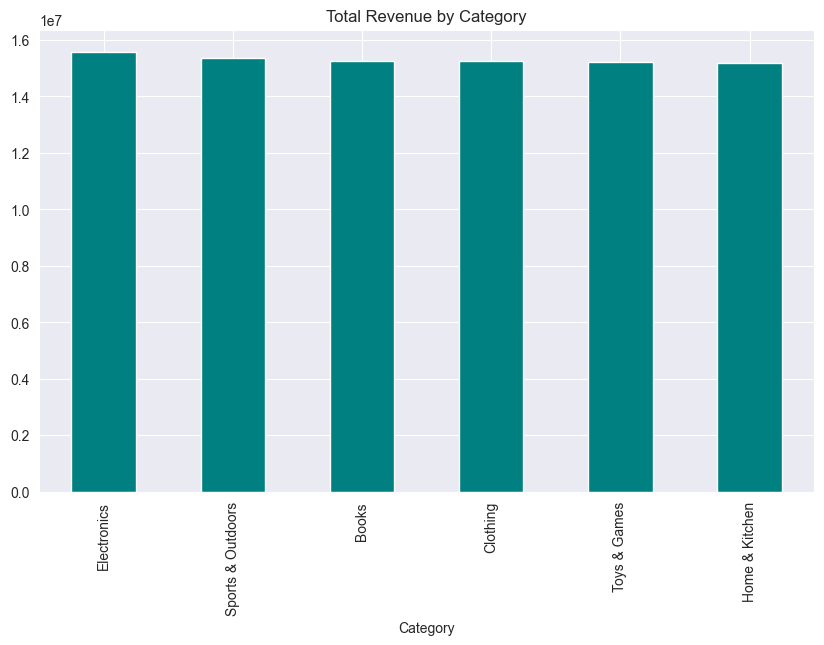

In [63]:
plt.figure(figsize=(10, 6))
df.groupby('Category')['TotalAmount'].sum().sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Total Revenue by Category')


## Electronic category has the highest revenue and sales by volume
Clothing has a higher revenue sales but a lower volume sale while Home & Kitchen category has a high volume sold but not as high a revenue

# Do repeat customers contribute more revenue that one-time customers

In [26]:
df.columns

Index(['OrderID', 'OrderDate', 'CustomerID', 'CustomerName', 'ProductID',
       'ProductName', 'Category', 'Brand', 'Quantity', 'UnitPrice', 'Discount',
       'Tax', 'ShippingCost', 'TotalAmount', 'PaymentMethod', 'OrderStatus',
       'City', 'State', 'Country', 'SellerID', 'Total Revenue'],
      dtype='object')

In [27]:
customer_orders = df.groupby("CustomerID")["OrderID"].nunique()
customer_orders.head()

CustomerID
CUST000001    1
CUST000002    3
CUST000003    1
CUST000004    3
CUST000005    1
Name: OrderID, dtype: int64

In [28]:
customer_type = customer_orders.apply(
    lambda x: "Repeat Customer" if x > 1 else "One-time customer"
)
df = df.merge(customer_type.rename('customer_type'),
              left_on='CustomerID',
              right_index = True)

In [32]:
revenue_by_type = df.groupby("customer_type")["Total Revenue"].sum()
revenue_by_type.sort_values(ascending=False)

customer_type
Repeat Customer      78676142.78
One-time customer    12345070.21
Name: Total Revenue, dtype: float64

## Repeating customers shows a larger revenue than one time customers

# Which days of the week generate the most sales?

In [34]:
df.columns

Index(['OrderID', 'OrderDate', 'CustomerID', 'CustomerName', 'ProductID',
       'ProductName', 'Category', 'Brand', 'Quantity', 'UnitPrice', 'Discount',
       'Tax', 'ShippingCost', 'TotalAmount', 'PaymentMethod', 'OrderStatus',
       'City', 'State', 'Country', 'SellerID', 'Total Revenue',
       'customer_type'],
      dtype='object')

In [36]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['DayOfWeek'] = df['OrderDate'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = df.groupby('DayOfWeek')["Total Revenue"].sum().reindex(day_order)
print(sales_by_day)

top_day = sales_by_day.idxmax()
print(f"The best day for sales is: {top_day}")

DayOfWeek
Monday       12877157.07
Tuesday      13230407.81
Wednesday    12854782.97
Thursday     13146959.45
Friday       13124283.55
Saturday     12968407.43
Sunday       12819214.71
Name: Total Revenue, dtype: float64
The best day for sales is: Tuesday


## Tuesday generates the highest revenue ($13230407.81)
Lowest day : Sunday had the lowest day

# Which 5 brands contribute the most to the total revenue


In [47]:
brand_rev = df.groupby('Brand')['Total Revenue'].sum().sort_values(ascending=False)
brand_rev.head()

Brand
CoreTech      9248868.28
KiddoFun      9241861.98
UrbanStyle    9189994.88
ReadMore      9189325.71
Zenith        9158670.71
Name: Total Revenue, dtype: float64

# The top 5 brand that contributed the most are
CoreTech

KiddoFun

UrbanStyle

ReadMore

Zenith

These Brands contribute to roughly $50.57\%$ of the total revenue ($46.4$ million out of $91.8$ million).



In [49]:
aov = df.groupby('Category')['Total Revenue'].mean().sort_values(ascending=False)
print(aov)

Category
Clothing             920.154647
Electronics          915.723151
Toys & Games         912.095215
Sports & Outdoors    905.398430
Home & Kitchen       904.923553
Books                903.124046
Name: Total Revenue, dtype: float64


# The Average Order Value (AOV) is very consistent across categories(around \\$910 - \\$930)
Clothing and Electronics lead the pack, suggesting they have attract higher spending customers


In [52]:
status_counts = df.groupby('ProductName')['OrderStatus'].value_counts().unstack()
status_counts['CancelRate'] = (status_counts['Cancelled'] / status_counts.sum(axis=1)) * 100
print(status_counts['CancelRate'].nlargest(5))

ProductName
4K Monitor         3.888335
Gaming Mouse       3.781095
Dress Shirt        3.736921
Backpack           3.717277
Children's Book    3.657262
Name: CancelRate, dtype: float64


# 4k Monitor has the highest cancellation rate suggesting an investigation on this product


## Correlations

In [53]:
correlation_dq = df['Discount'].corr(df['Quantity'])
print(f"Correlation bewtween discoint and quantity: {correlation_dq}")
if abs(correlation_dq) < 0.1:
    print("Insight: THere is virtually no correlation between discount and quantity")

Correlation bewtween discoint and quantity: -0.0003976253134070761
Insight: THere is virtually no correlation between discount and quantity


# There is no correlation between discount and Volume sale
Indicating discount doesnt increase the quantity of product sold

In [54]:
correlation_st = df['ShippingCost'].corr(df['Total Revenue'])
shipping_analysis = df.groupby('Country').agg({
    'ShippingCost': 'mean',
    'TotalAmount': 'mean'
}).reset_index()
shipping_analysis['Shipping_Share_%'] = (shipping_analysis['ShippingCost'] / shipping_analysis['TotalAmount']) * 100

print("\n2. Shipping Cost Analysis by Country:")
print(shipping_analysis[['Country', 'Shipping_Share_%']])


2. Shipping Cost Analysis by Country:
          Country  Shipping_Share_%
0       Australia          0.811602
1          Canada          0.814880
2           India          0.801509
3  United Kingdom          0.800400
4   United States          0.807155


## In most countries shipping cost are consistently low, averaging around 0.80% to 0.81% of the total order value

In [55]:
median_price = df['TotalAmount'].median()

df['Segment'] = df['TotalAmount'].apply(lambda x: 'High-Value' if x > median_price else 'Low-Value')

# Create a percentage-based table of payment methods per segment
payment_segments = pd.crosstab(df['Segment'], df['PaymentMethod'], normalize='index') * 100

print("\n3. Payment Method Preferences (%) by Segment:")
print(payment_segments.round(2))


3. Payment Method Preferences (%) by Segment:
PaymentMethod  Amazon Pay  Cash on Delivery  Credit Card  Debit Card  \
Segment                                                                
High-Value          14.89              4.97        34.85       20.21   
Low-Value           15.14              4.89        35.23       19.83   

PaymentMethod  Net Banking    UPI  
Segment                            
High-Value            9.86  15.22  
Low-Value            10.00  14.91  


## Credit Cards are the dominant choice for both High-Value ($34.85\%$) and Low-Value ($35.22\%$) orders.
Debit Cards follow at roughly $20\%$

UPI and Amazon Pay each capture about $15\%$

Cash on Delivery (CoD) remains the least popular at ~ $5\%$.

In [58]:
state_metrics = df.groupby('State').agg({
    'Total Revenue': 'sum',
    'ShippingCost': 'mean'
}).rename(columns={'Total Revenue': 'Revenue', 'ShippingCost': 'AvgShipping'})

# Sort to find the best balance
gold_mines = state_metrics.sort_values(by=['Revenue', 'AvgShipping'], ascending=[False, True]).head(10)
gold_mines

,Revenue,AvgShipping
State,,
TX,22668646.50,7.401751
CA,18046715.66,7.382095
NC,4701216.49,7.464284
WA,4627702.65,7.413945
PA,4610416.09,7.432122
IL,4598663.29,7.420618
CO,4588156.14,7.433058
IN,4569001.77,7.368690
FL,4568169.75,7.321453


## The Leaders: Texas (TX) and California (CA) are your massive revenue drivers, bringing in $\$22.8M$ and $\$18.2M$ respectively.
The Efficiency Play: Among high-revenue states, Florida (FL) and Indiana (IN) have slightly lower average shipping costs ($\approx \$7.32-\$7.36$), making them highly profitable regions to double down on.

In [60]:
customer_dist = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
customer_dist

Country
United States     37731
India             12976
Canada             5486
United Kingdom     4742
Australia          3969
Name: CustomerID, dtype: int64

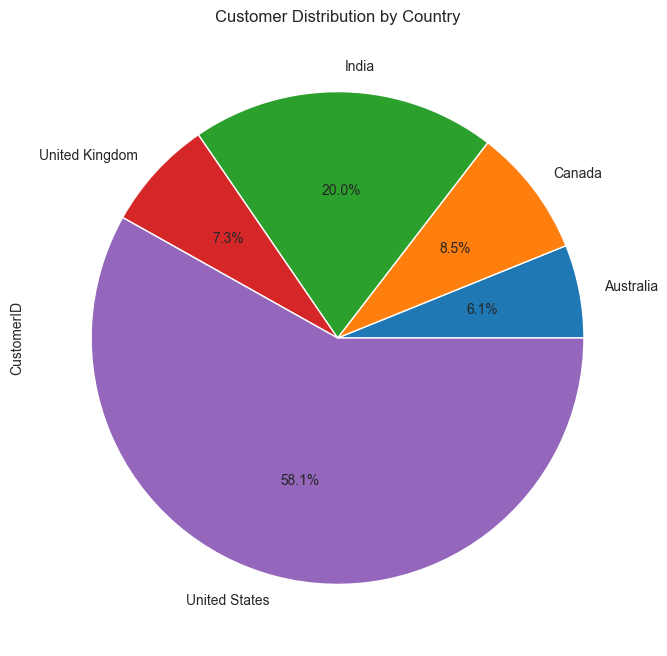

In [64]:
plt.figure(figsize=(8, 8))
df.groupby('Country')['CustomerID'].nunique().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Distribution by Country')
plt.savefig('distribution.png')

## USA leads massively in unique customers among the Countries
India in second followed by Canada, UK, Australia: Significant secondary markets ranging from $4,000$ to $5,500$ customers.

In [61]:
customer_spend = df.groupby(['CustomerID', 'CustomerName'])['TotalAmount'].sum().reset_index()
threshold = customer_spend['TotalAmount'].quantile(0.99)
power_users = customer_spend[customer_spend['TotalAmount'] >= threshold]
print(f"\nTotal Power Users Identified: {len(power_users)}")


Total Power Users Identified: 995


## There are 995 top customers who spent significantly more than the average

## 🎯 Final Executive Summary

After analyzing over 100,000 transactions, the following key business insights were identified:

* **Revenue Drivers:** The Top 5 brands (CoreTech, KiddoFun, etc.) account for **50.5% of total revenue**, highlighting a heavy reliance on a few key vendors.
* **Geographic Hubs:** **Texas and California** are the primary "Gold Mine" states, combining high volume with stable shipping costs.
* **Operational Red Flags:** The **4K Monitor** has the highest cancellation rate (~3.9%), suggesting a need for quality control or description audits for that specific product.
* **Customer Behavior:** Discount levels show **zero correlation** with quantity sold, indicating that customers in this dataset are not primarily "discount-driven."
* **Peak Performance:** **Tuesdays** are the highest revenue days, while weekends show a slight dip in activity.

# 💡 Strategic Recommendations

1. **Marketing Timing:** Shift major promotional emails and "Flash Sales" to **Tuesday mornings** to align with peak shopping behavior.
2. **Profit Optimization:** Since discounts aren't driving volume, consider **reducing flat discounts** and instead testing "Buy One Get One" or bundled offers to see if they move more units.
3. **Logistics:** Focus expansion efforts in **Indiana and Florida**, as they show high revenue potential with the most efficient (lowest) shipping-to-total-amount ratios.
4. **Retention:** Launch a **VIP Loyalty Program** specifically targeting the 995 "Power Users" identified in this analysis to protect the top 1% of revenue.